In [79]:
import pandas as pd
import numpy as np
import re
import sys

import time
import datetime

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import Lasso

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Load the dataset
file_path = "/content/drive/MyDrive/googleplaystore.csv"
google_play_store_df = pd.read_csv(file_path)
# Display the first few rows of the dataset
google_play_store_df.head()


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [5]:
# Checking the dimensions of the dataset
print("Dimensions of the dataset:", google_play_store_df.shape)

# Displaying the data types of each column
print("\nData types of each column:\n", google_play_store_df.dtypes)

# Displaying summary statistics
print("\nSummary statistics:\n", google_play_store_df.describe(include='all'))


Dimensions of the dataset: (10841, 13)

Data types of each column:
 App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

Summary statistics:
            App Category       Rating Reviews                Size    Installs  \
count    10841    10841  9367.000000   10841               10841       10841   
unique    9660       34          NaN    6002                 462          22   
top     ROBLOX   FAMILY          NaN       0  Varies with device  1,000,000+   
freq         9     1972          NaN     596                1695        1579   
mean       NaN      NaN     4.193338     NaN                 NaN         NaN   
std        NaN      NaN     0.537431     NaN                 NaN         NaN  

In [6]:
# Looking at Column Data Types and other Info
google_play_store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [7]:
# Viewing Last 10 Entries of the Dataset
google_play_store_df.tail(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10831,payermonstationnement.fr,MAPS_AND_NAVIGATION,NaN,38,9.8M,"5,000+",Free,0,Everyone,Maps & Navigation,"June 13, 2018",2.0.148.0,4.0 and up
10832,FR Tides,WEATHER,3.8,1195,582k,"100,000+",Free,0,Everyone,Weather,"February 16, 2014",6.0,2.1 and up
10833,Chemin (fr),BOOKS_AND_REFERENCE,4.8,44,619k,"1,000+",Free,0,Everyone,Books & Reference,"March 23, 2014",0.8,2.2 and up
10834,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10835,FR Forms,BUSINESS,NaN,0,9.6M,10+,Free,0,Everyone,Business,"September 29, 2016",1.1.5,4.0 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [8]:
# Checking for null values
google_play_store_df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

Null Values will be dealt with subsequently, but first to get an idea of the types of Categories that the applications are distributed into.

In [9]:
# Checking for duplicate rows
duplicate_rows = google_play_store_df.duplicated().sum()

print("Number of duplicate rows:", duplicate_rows)



Number of duplicate rows: 483


In [10]:
# Removing duplicated rows
google_play_store_df = google_play_store_df.drop_duplicates()

# Checking the new dimensions of the dataset
print("New dimensions of the dataset after dropping duplicates:", google_play_store_df.shape)


New dimensions of the dataset after dropping duplicates: (10358, 13)


In [11]:
# Checking all Categories
print(google_play_store_df['Category'].unique())

# Displaying number of Categories
print("There are ",google_play_store_df['Category'].nunique(), "Unique Categories")

['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION' '1.9']
There are  34 Unique Categories


In [12]:
# Viewing what's at Category = 1.9
google_play_store_df.loc[google_play_store_df['Category'] == '1.9']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [13]:
# Displaying Unique Genres
print(google_play_store_df['Genres'].unique())

['Art & Design' 'Art & Design;Pretend Play' 'Art & Design;Creativity'
 'Art & Design;Action & Adventure' 'Auto & Vehicles' 'Beauty'
 'Books & Reference' 'Business' 'Comics' 'Comics;Creativity'
 'Communication' 'Dating' 'Education;Education' 'Education'
 'Education;Creativity' 'Education;Music & Video'
 'Education;Action & Adventure' 'Education;Pretend Play'
 'Education;Brain Games' 'Entertainment' 'Entertainment;Music & Video'
 'Entertainment;Brain Games' 'Entertainment;Creativity' 'Events' 'Finance'
 'Food & Drink' 'Health & Fitness' 'House & Home' 'Libraries & Demo'
 'Lifestyle' 'Lifestyle;Pretend Play' 'Adventure;Action & Adventure'
 'Arcade' 'Casual' 'Card' 'Casual;Pretend Play' 'Action' 'Strategy'
 'Puzzle' 'Sports' 'Music' 'Word' 'Racing' 'Casual;Creativity'
 'Casual;Action & Adventure' 'Simulation' 'Adventure' 'Board' 'Trivia'
 'Role Playing' 'Simulation;Education' 'Action;Action & Adventure'
 'Casual;Brain Games' 'Simulation;Action & Adventure'
 'Educational;Creativity' 'Puzzle

In [14]:
# Checking entries at Genres = February 11, 2018
google_play_store_df.loc[google_play_store_df['Genres'] == 'February 11, 2018']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


This Entry stands out due to it's Category and Genre, both of which don't make sense and can be atributed to an error. So we will drop it.

In [15]:
# prompt: i want to remove the row displayed in the previous cell

google_play_store_df.drop(google_play_store_df.loc[google_play_store_df['Category'] == '1.9'].index, inplace=True)


Now we deal with missing values. The rows are being dropped as opposed to being imputed as the target variable is "Rating" and imputing averages into the dataset could lead to an innacurate model.


In [16]:
# Dealing with missing/ null values by dropping such rows
google_play_store_df = google_play_store_df.drop(google_play_store_df[google_play_store_df['Rating'].isnull()].index, axis=0)
google_play_store_df = google_play_store_df.drop(google_play_store_df[google_play_store_df['Type'].isnull()].index, axis=0)
google_play_store_df = google_play_store_df.drop(google_play_store_df[google_play_store_df['Content Rating'].isnull()].index, axis=0)
google_play_store_df = google_play_store_df.drop(google_play_store_df[google_play_store_df['Current Ver'].isnull()].index, axis=0)
google_play_store_df = google_play_store_df.drop(google_play_store_df[google_play_store_df['Android Ver'].isnull()].index, axis=0)

Now, all the data has been cleaned and null values have been dealt with.

Moving on to Visualisations for a better understanding of how the data is distributed.

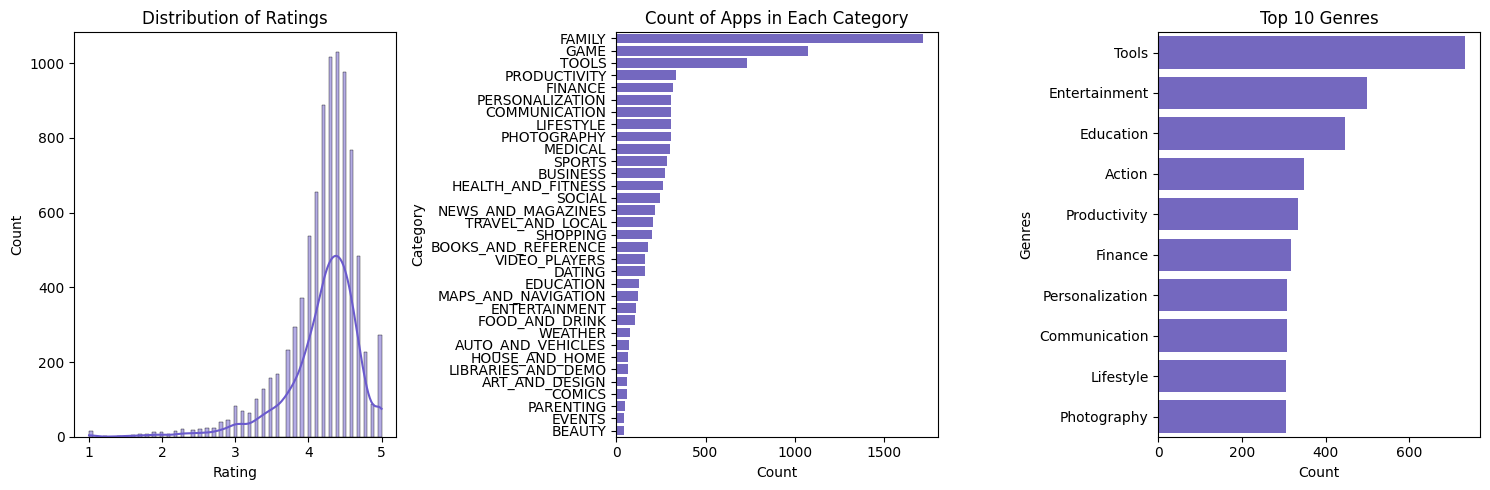

In [17]:
# Plotting histograms and bar plots for 'Ratings', 'Categories', and 'Genres'

plt.figure(figsize=(15, 5))

# Histogram for 'Rating'
plt.subplot(1, 3, 1)
sns.histplot(google_play_store_df['Rating'], color='slateblue', kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')

# Bar Plot for 'Category'
plt.subplot(1, 3, 2)
sns.countplot(y=google_play_store_df['Category'], order=google_play_store_df['Category'].value_counts().index, color='slateblue')
plt.title('Count of Apps in Each Category')
plt.xlabel('Count')
plt.ylabel('Category')

# Bar Plot for 'Genres'
plt.subplot(1, 3, 3)
top_genres = google_play_store_df['Genres'].value_counts().head(10)  # Selecting top 10 genres for clarity in visualization
sns.barplot(x=top_genres.values, y=top_genres.index, color='slateblue')
plt.title('Top 10 Genres')
plt.xlabel('Count')
plt.ylabel('Genres')

plt.tight_layout()
plt.show()


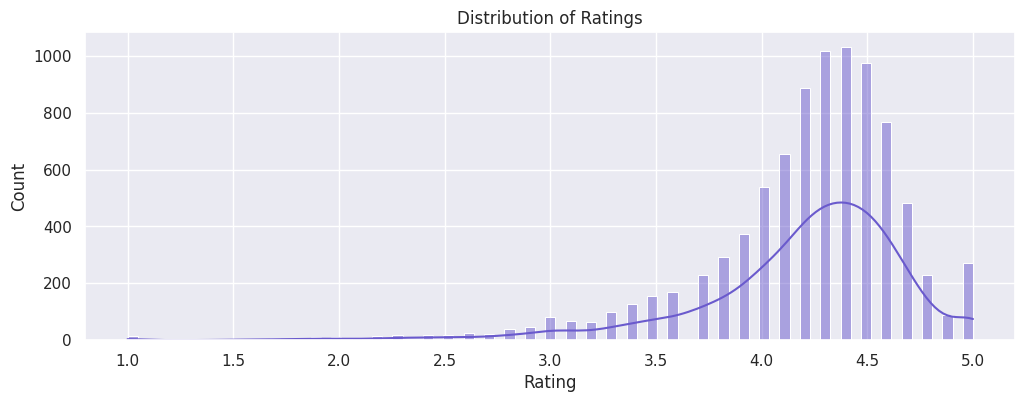

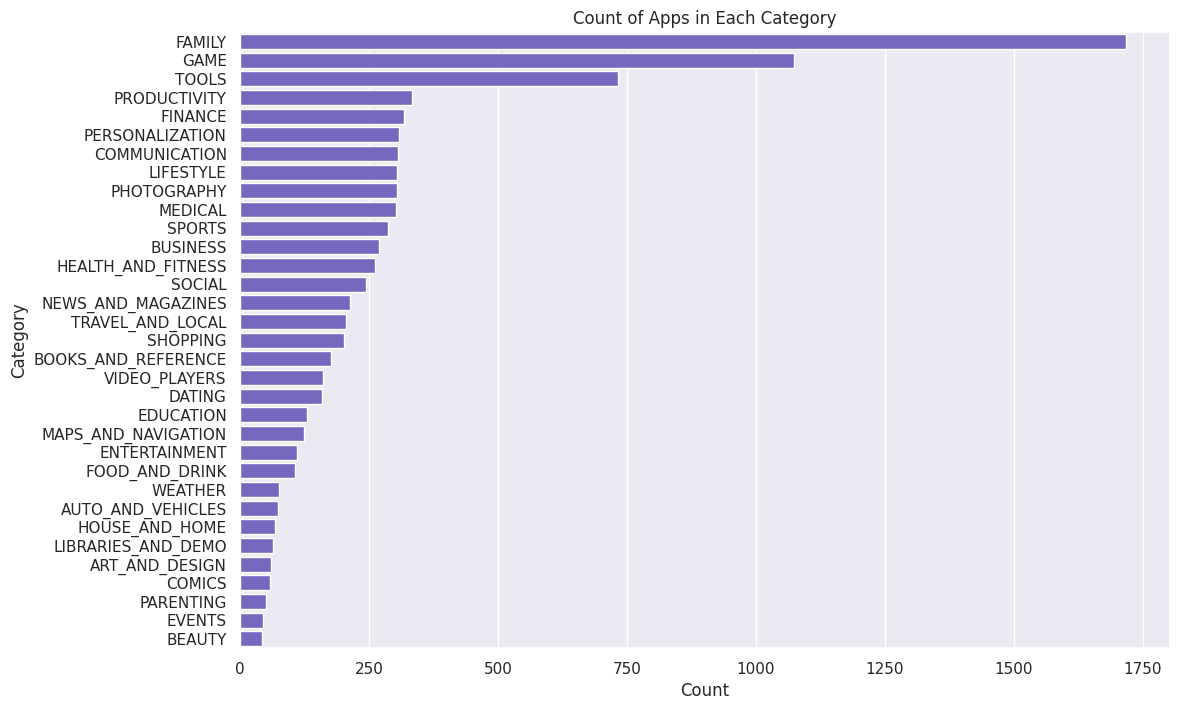

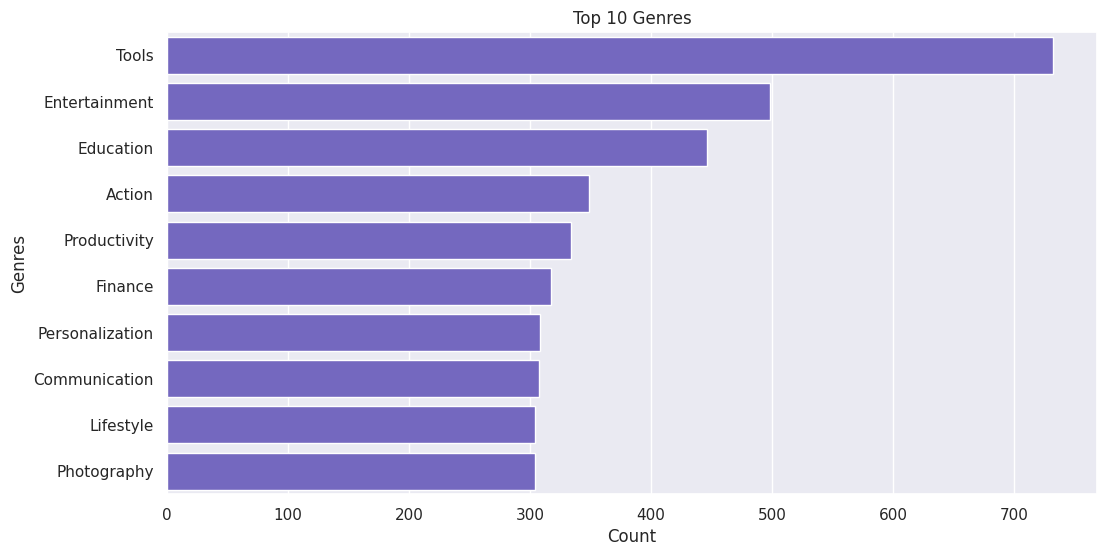

In [18]:
# Setting a dark color theme for the plots
sns.set_theme(style="darkgrid")

# Histogram for 'Rating'
plt.figure(figsize=(12, 4))
sns.histplot(google_play_store_df['Rating'], color='slateblue', kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

# Bar Plot for 'Category'
plt.figure(figsize=(12, 8))
sns.countplot(y=google_play_store_df['Category'], order=google_play_store_df['Category'].value_counts().index, color='slateblue')
plt.title('Count of Apps in Each Category')
plt.xlabel('Count')
plt.ylabel('Category')
plt.show()

# Bar Plot for 'Genres' (selecting top 10 for clarity)
plt.figure(figsize=(12, 6))
top_genres = google_play_store_df['Genres'].value_counts().head(10)
sns.barplot(x=top_genres.values, y=top_genres.index, color='slateblue')
plt.title('Top 10 Genres')
plt.xlabel('Count')
plt.ylabel('Genres')
plt.show()


#Distribution of Ratings:
The histogram shows a skew to the right, where most of the reviews are between 4 and 5. Lower ratings (1 to 3) have fewer apps, reflecting either fewer poorly rated apps or a tendency for users to not rate lower-quality apps.

#Count of Apps in Each Category:
Family, Games and Tools are the Categories with the most applications.

#Top 10 Genres:
Tools, Entertainment, Education and Action are the top recurring Genres in the dataset.

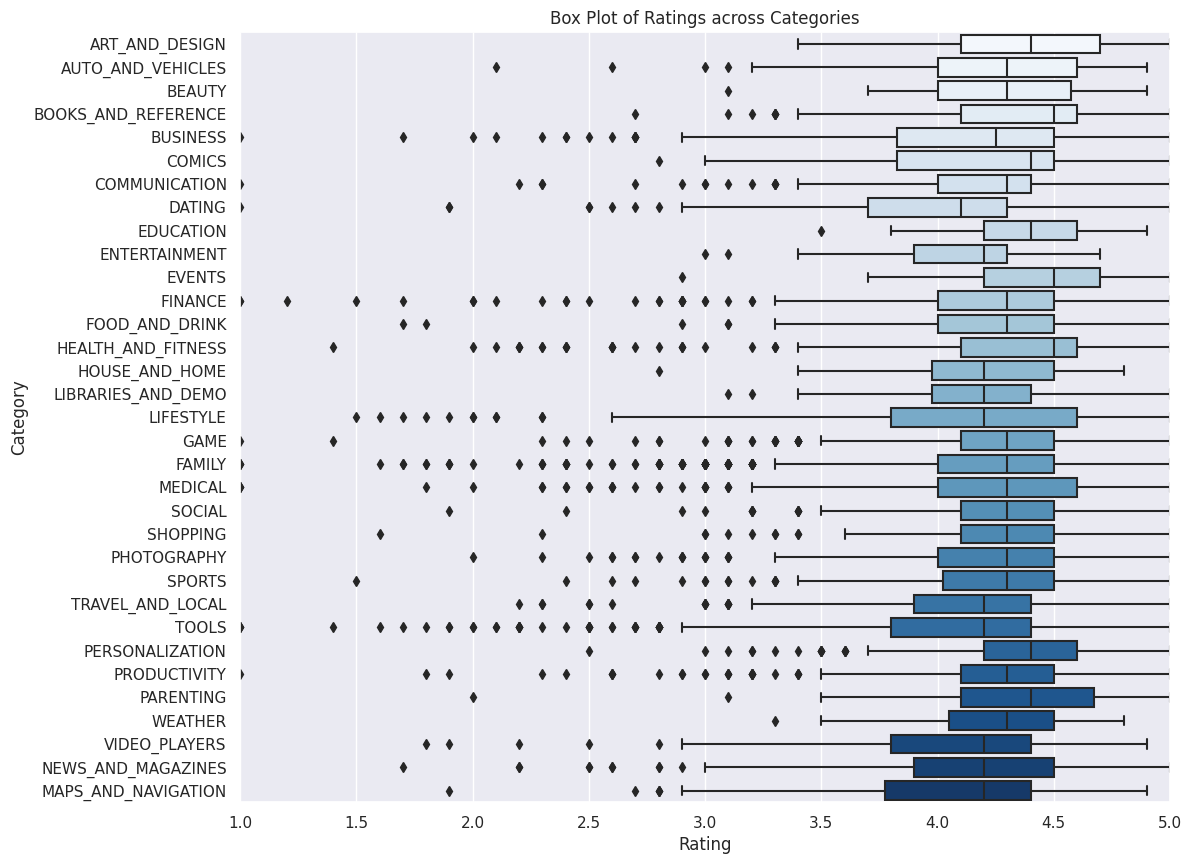

In [19]:
# Making Box Plots to see Distribution of Ratings against Categories
# Illustrates outlliers and general dispersal of data

plt.figure(figsize=(12, 10))
sns.boxplot(x='Rating', y='Category', data=google_play_store_df, palette="Blues")
plt.title('Box Plot of Ratings across Categories')
plt.xlim(1.0, 5.0)

plt.show()


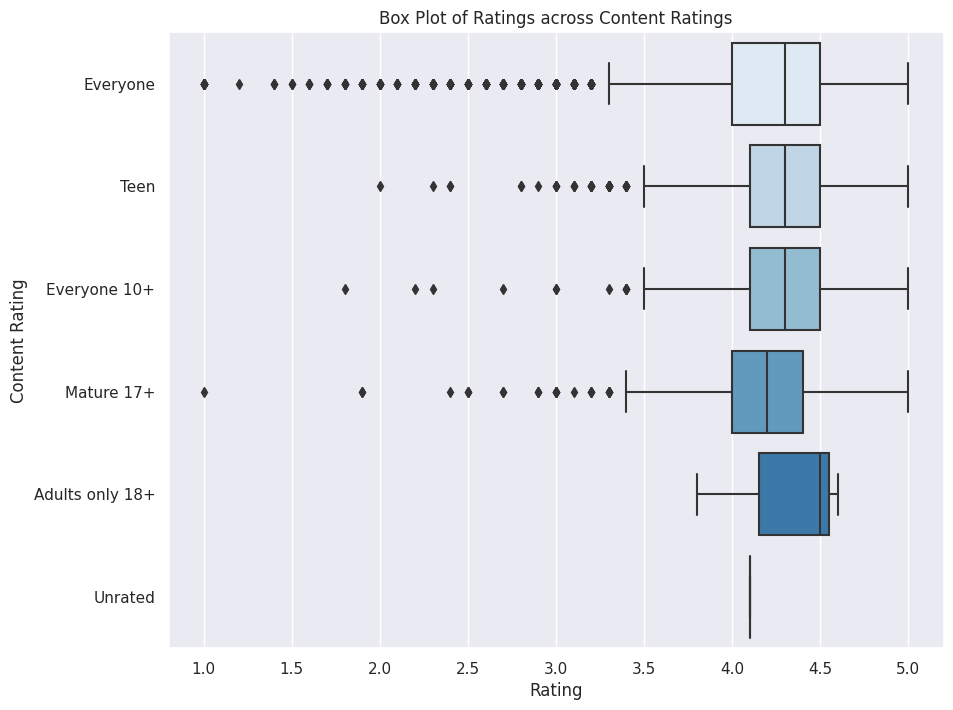

In [20]:
# Making a box plot to show the distribution of outliers and Ratings across content ratings

plt.figure(figsize=(10, 8))
sns.boxplot(x='Rating', y='Content Rating', data=google_play_store_df, palette="Blues")
plt.title('Box Plot of Ratings across Content Ratings')
plt.show()

Now we make a correlation heatmap to see how strongly features are correlated

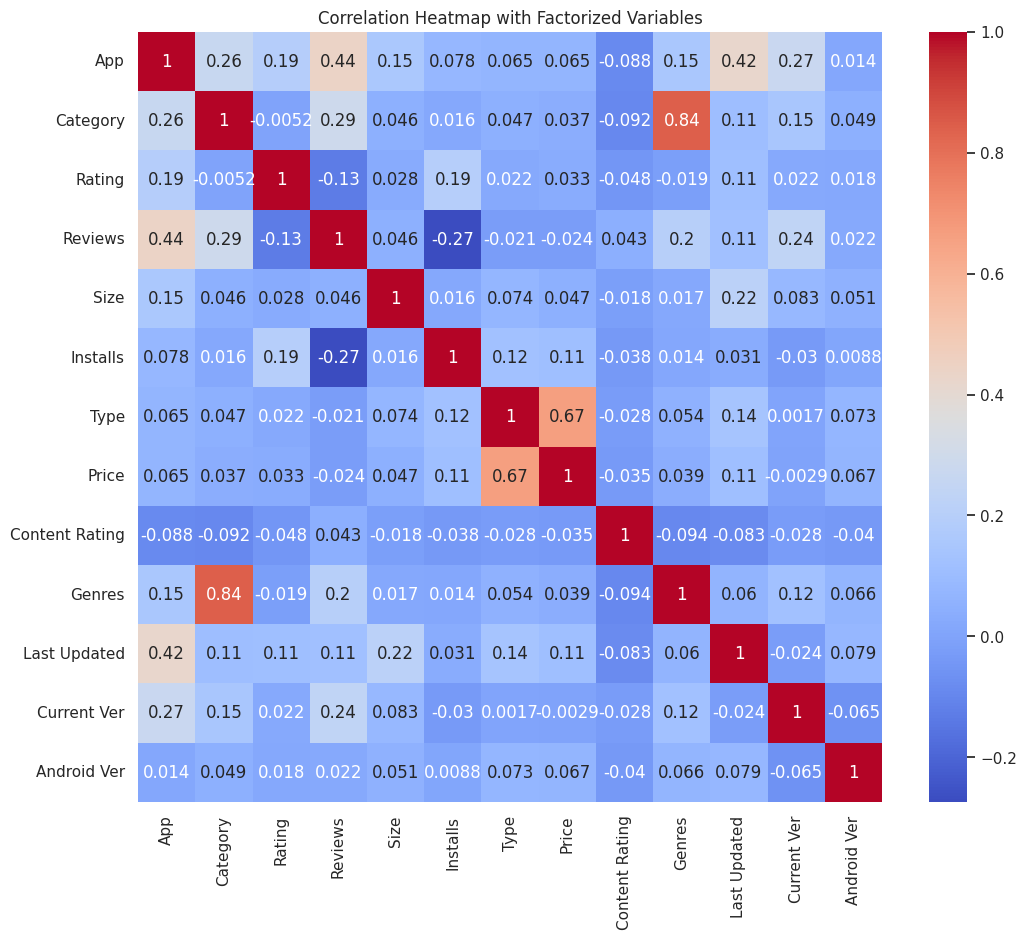

In [21]:
# Correlation Heatmap

# Converting 'Type' to a binary format: 1 for 'Paid' and 0 for others
google_play_store_df["Type"] = (google_play_store_df["Type"] == "Paid").astype(int)

# Applying factorize to each column and calculating the correlation matrix
corr_factorized = google_play_store_df.apply(lambda x: x.factorize()[0]).corr()

# Plotting the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_factorized, xticklabels=corr_factorized.columns, yticklabels=corr_factorized.columns, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap with Factorized Variables')
plt.show()


Extracting useful information from this, we can see that the number of installs of the applications have the highest negative correlation with Reviews. More downloads = lesser reviews.

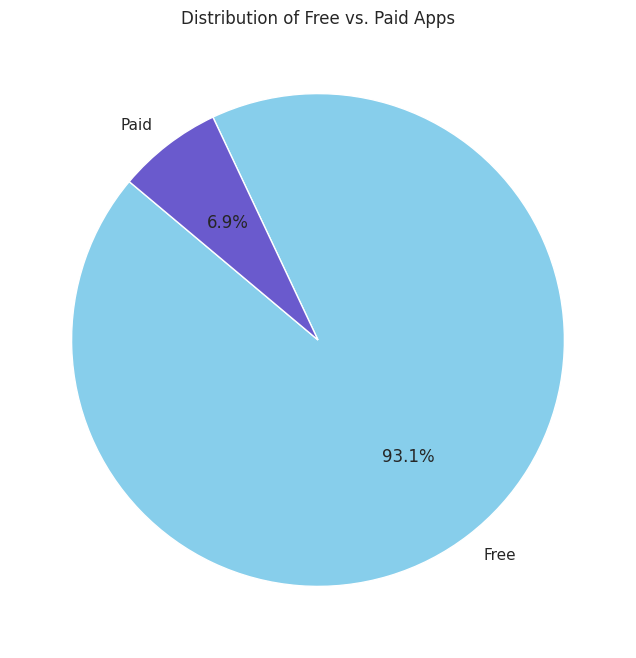

In [22]:
# Making a pie chart to visualise ditribution of apps via Price (Free and Paid)

# Counting the number of Free and Paid apps
type_counts = google_play_store_df['Type'].value_counts()

# Labels for the pie chart
labels = ['Free' if label == 0 else 'Paid' for label in type_counts.index]

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(type_counts, labels=labels, colors=['skyblue', 'slateblue'], autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Free vs. Paid Apps')
plt.show()


This clerly shows that the vast majority of applications on the Google Playstore are free

Sandardising columns for further EDA

In [23]:
# Cleaning and transforming the 'Price' column in google_play_store_df

# Replacing the dollar sign and converting to float
google_play_store_df['Price'] = google_play_store_df['Price'].str.replace("$", "")
google_play_store_df['Price'] = pd.to_numeric(google_play_store_df['Price'], errors='coerce').fillna(0)

# Checking the transformation
google_play_store_df['Price'].head()


<ipython-input-23-c207e1b8d165>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  google_play_store_df['Price'] = google_play_store_df['Price'].str.replace("$", "")


0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Price, dtype: float64

In [24]:
# The Size column was incorrectly transformed, so now we restore the Size back from the original CSV file

original_df = pd.read_csv('/content/drive/MyDrive/googleplaystore.csv')
original_df_no_duplicates = original_df.drop_duplicates(subset='App')
google_play_store_df = google_play_store_df.merge(original_df_no_duplicates[['App', 'Size']], on='App', suffixes=('', '_original'))
google_play_store_df['Size'] = google_play_store_df['Size_original']
google_play_store_df.drop('Size_original', axis=1, inplace=True)

In [25]:
google_play_store_df['Size'].head()
# Ok we got the size back, now we properly transform it

0     19M
1     14M
2     14M
3    8.7M
4     25M
Name: Size, dtype: object

In [26]:
backup_google_play_store_df = google_play_store_df
# Making a backup just incase anything goes south
backup_google_play_store_df['Size'].head()

0     19M
1     14M
2     14M
3    8.7M
4     25M
Name: Size, dtype: object

In [27]:
# Replacing 'Varies with device' with '0'
google_play_store_df['Size'] = google_play_store_df['Size'].str.replace('Varies with device', '0')

# Extracting the numeric part and the unit
numeric_part = google_play_store_df['Size'].str.extract(r'([\d\.]+)', expand=False).astype(float)
unit = google_play_store_df['Size'].str.extract(r'([Mk])', expand=False)

# Applying the conversion: 'M' is multiplied by 1,000,000 and 'k' by 1,000
google_play_store_df['Size'] = numeric_part * unit.replace({'M': 10**6, 'k': 10**3}, inplace=False).fillna(1)

# Checking the transformation
google_play_store_df['Size'].head()


0    19000000.0
1    14000000.0
2    14000000.0
3     8700000.0
4    25000000.0
Name: Size, dtype: float64

In [28]:
google_play_store_df['Size'].tail(20)
# The Size column has been properly transformed, formatted and cleaned

8866    24000000.0
8867    21000000.0
8868    13000000.0
8869    31000000.0
8870     4900000.0
8871     8000000.0
8872     3600000.0
8873     8600000.0
8874           0.0
8875    13000000.0
8876    13000000.0
8877     7400000.0
8878     2300000.0
8879      582000.0
8880      619000.0
8881     2600000.0
8882    53000000.0
8883     3600000.0
8884           0.0
8885    19000000.0
Name: Size, dtype: float64

<Axes: >

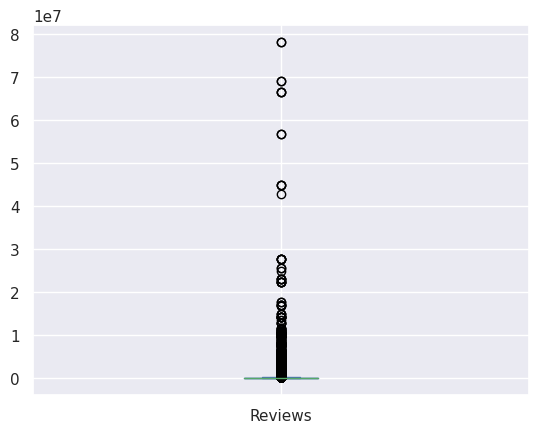

In [29]:
# Now moving on the Reviews Column

# Convert 'Reviews' to numeric, coercing any non-numeric values to NaN
google_play_store_df['Reviews'] = pd.to_numeric(google_play_store_df['Reviews'], errors='coerce')

# Handling NaN values (filling then with 0)

google_play_store_df['Reviews'].fillna(0, inplace=True)

# Optionally, check for outliers using a boxplot
google_play_store_df['Reviews'].plot(kind='box')


In [33]:
# Changing Last Updated Column to Date Time for analysis

google_play_store_df['Last Updated'] = pd.to_datetime(google_play_store_df['Last Updated'], format='%B %d, %Y')


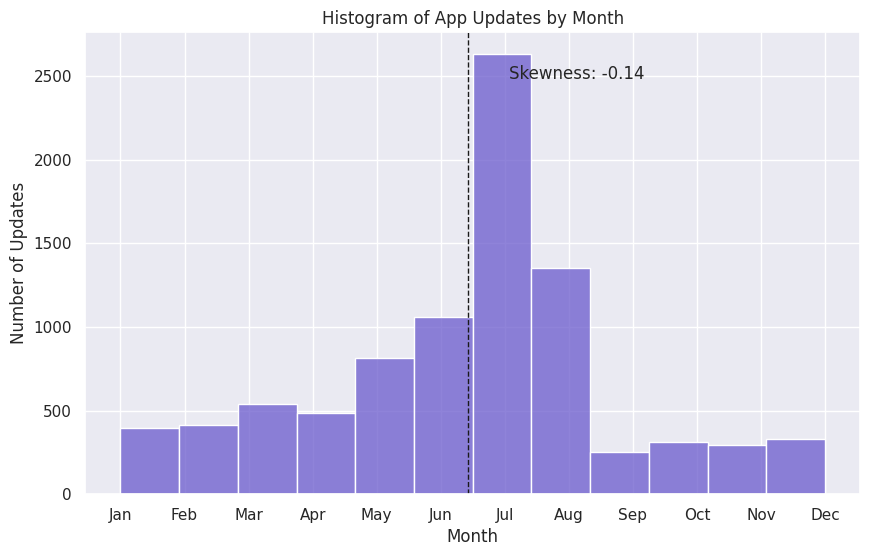

In [35]:
# Making histograms to analyse which months were most favourable for application updates

google_play_store_df['Updated Month'] = google_play_store_df['Last Updated'].dt.month

# Creating the histogram
plt.figure(figsize=(10, 6))
sns.histplot(google_play_store_df['Updated Month'], bins=12, color='slateblue', kde=False)
plt.title('Histogram of App Updates by Month')
plt.xlabel('Month')
plt.ylabel('Number of Updates')

# Month names
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

plt.show()

This shows that summer months were favoured by developers to update their applications, this could be attributed to summer vacations and holidays, but we will investigate it further, later.

In [42]:
google_play_store_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Updated Month
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,"10,000+",0,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,1
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,"500,000+",0,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,1
2,Coloring book moana,FAMILY,3.9,974,14000000.0,"500,000+",0,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,1
3,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000.0,"5,000,000+",0,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,8
4,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,"50,000,000+",0,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,6


In [41]:
google_play_store_df['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [43]:
# Finally, we Clean and transform Installs Column

# Removing '+' and ',' from the 'Installs' column
google_play_store_df['Installs'] = google_play_store_df['Installs'].str.replace("+", "").str.replace(",", "")

# Converting 'Installs' to an integer
google_play_store_df['Installs'] = google_play_store_df['Installs'].astype(int)

# Checking the transformation
google_play_store_df['Installs'].head()


<ipython-input-43-6551d56f3876>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  google_play_store_df['Installs'] = google_play_store_df['Installs'].str.replace("+", "").str.replace(",", "")


0       10000
1      500000
2      500000
3     5000000
4    50000000
Name: Installs, dtype: int64

# I decided to not merge the User Reviews CSV File into this data set as reviews are biased, and very very little people actually leave negative reviews. Most people who dont like the application just tend to delete the application.

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable h

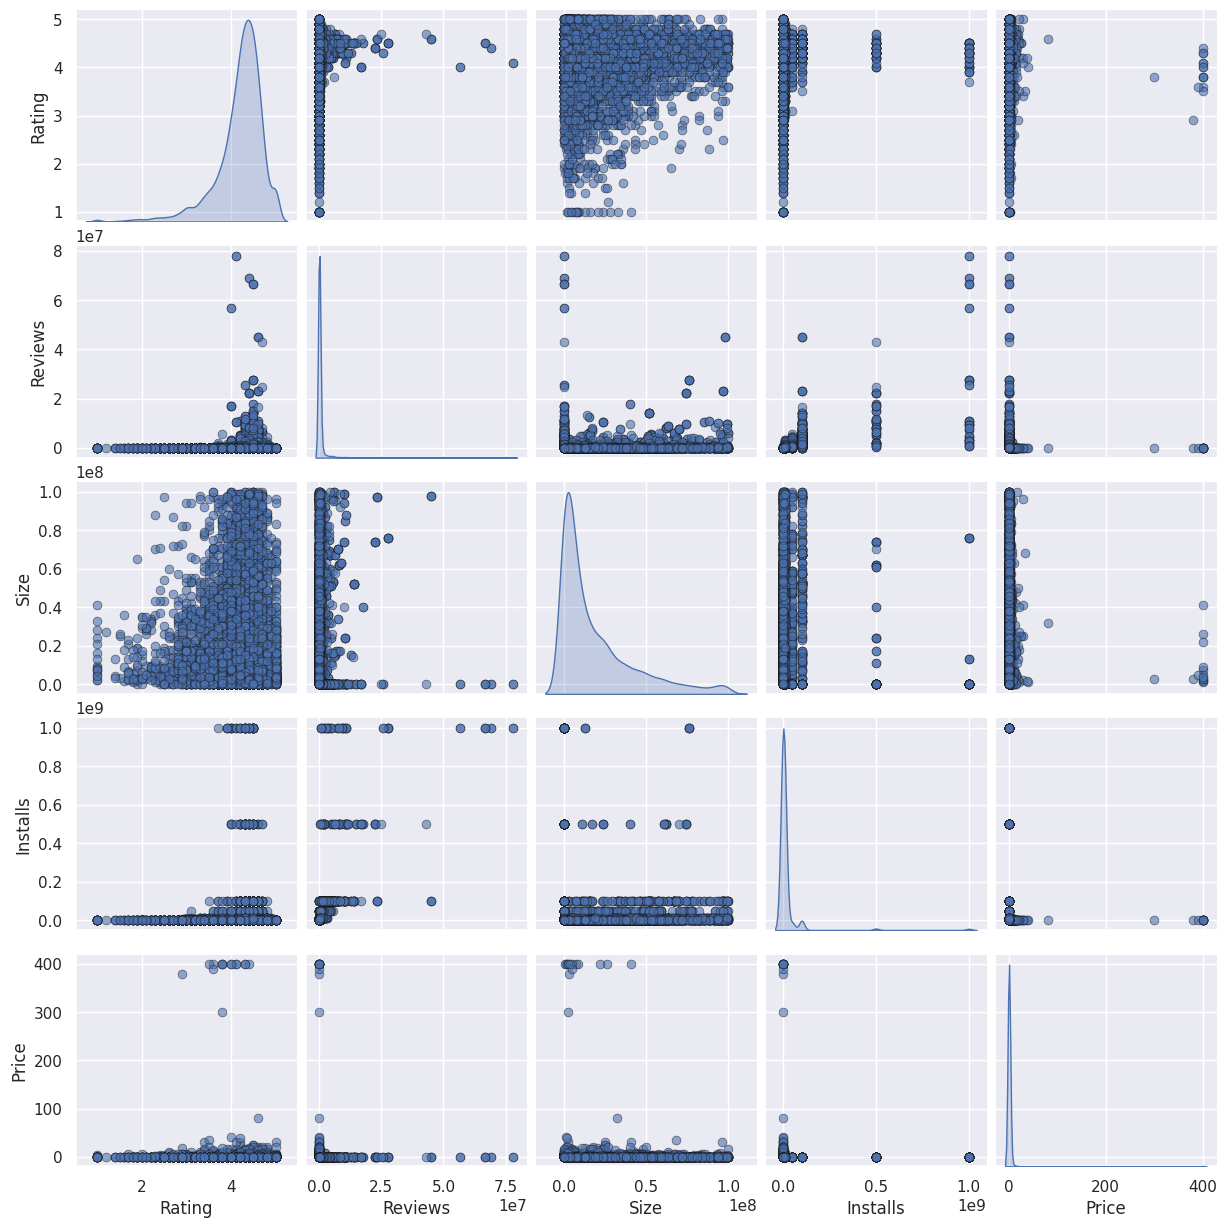

In [78]:
# Now to see major correlation between features that will be mainly used for the linear regression model

# Features to include in the scatter plots
features = ['Rating', 'Reviews', 'Size', 'Installs', 'Price']

# Pairplot for all selected features
sns.pairplot(google_play_store_df[features], diag_kind='kde', plot_kws={'alpha':0.6, 's':40, 'edgecolor':'k'}, palette='Blues')
plt.show()

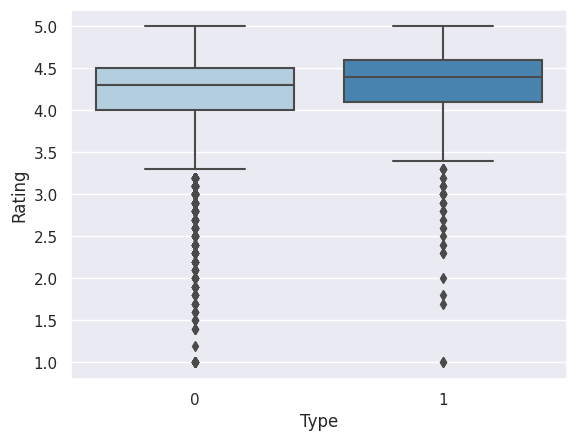

0 = FREE 
1 = PAID


In [77]:
# Box plot for 'Type' against 'Rating'
sns.boxplot(x='Type', y='Rating', data=google_play_store_df, palette='Blues')
plt.show()
print("0 = FREE \n1 = PAID")

We need to clarify a few features before building and testing a model.
Firstly, instead of just installs, let's call an application "Succesful" if it surpases 1000 downloads.

In [61]:
# Defining a successful app as one with more than 10,000 installs
google_play_store_df['Is_Successful'] = google_play_store_df['Installs'] > 10000


Saving a copy of the dataframe incase something goes south

In [63]:
# Creating a copy of the original DataFrame
processed_df = google_play_store_df.copy()

In [64]:
# Dropping unnecessary columns
processed_df.drop(['Last Updated', 'Current Ver', 'Android Ver', 'Updated Month', 'App'], axis=1, inplace=True)

In [66]:
# One-Hot Encoding of Categorical Columns
categorical_cols = ['Category', 'Content Rating', 'Genres']  # Add other columns as needed
processed_df = pd.get_dummies(processed_df, columns=categorical_cols)


   Rating  Reviews        Size  Installs  Type  Price  Is_Successful  \
0     4.1      159  19000000.0     10000     0    0.0          False   
1     3.9      967  14000000.0    500000     0    0.0           True   
2     3.9      974  14000000.0    500000     0    0.0           True   
3     4.7    87510   8700000.0   5000000     0    0.0           True   
4     4.5   215644  25000000.0  50000000     0    0.0           True   

   Category_ART_AND_DESIGN  Category_AUTO_AND_VEHICLES  Category_BEAUTY  ...  \
0                        1                           0                0  ...   
1                        1                           0                0  ...   
2                        0                           0                0  ...   
3                        1                           0                0  ...   
4                        1                           0                0  ...   

   Genres_Tools  Genres_Tools;Education  Genres_Travel & Local  \
0             0     

In [68]:
# Splitting the data
X = processed_df.drop('Rating', axis=1)  # Assuming 'Rating' is the target variable
y = processed_df['Rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Building Linear Regression Model

In [71]:
# Building the Linear Regression model
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train, y_train)

LinearRegression()

# Model Evaluation

In [73]:
# Predicting the ratings
y_pred = lin_reg_model.predict(X_test)

# Calculating the metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared:", r2)


Mean Squared Error (MSE): 0.2768851952878708
Mean Absolute Error (MAE): 0.36431244566572135
R-squared: 0.04801223518632236


In [95]:
# Getting the coefficients
coefficients = lin_reg_model.coef_

# Creating a DataFrame for easier visualization
feature_names = X_train.columns
coef_df = pd.DataFrame(coefficients, index=feature_names, columns=['Coefficient'])

# Displaying the coefficients
print(coef_df.head(60))
print(coef_df.tail(60))


                                      Coefficient
Reviews                              6.882036e-09
Size                                 3.525487e-10
Installs                             8.375574e-11
Type                                 1.209642e-01
Price                               -8.250870e-04
Is_Successful                        9.981734e-02
Category_ART_AND_DESIGN              1.029962e-01
Category_AUTO_AND_VEHICLES          -3.338861e-02
Category_BEAUTY                      2.552056e-02
Category_BOOKS_AND_REFERENCE         6.729197e-02
Category_BUSINESS                   -3.803643e-02
Category_COMICS                      1.765111e-01
Category_COMMUNICATION              -4.425336e-02
Category_DATING                     -1.055546e-01
Category_EDUCATION                   4.238579e-02
Category_ENTERTAINMENT              -5.505843e-02
Category_EVENTS                      9.244431e-02
Category_FAMILY                     -1.571079e-02
Category_FINANCE                    -1.993973e-02


#Linear Regression Model Analysis
**Model Performance**: Similar to Lasso, with a Mean Squared Error of 0.2788 and a low R-squared of 0.0415, indicating the model explains only a small portion of the variance in app ratings.

**Influential Features**: Slight positive correlation with 'Reviews', 'Size', and 'Installs'; minor negative correlation with 'Price'. Different impacts are observed across various app categories and genres.

**Implications**: The analysis suggests a nuanced influence of different factors on app ratings. Marketing strategies and user engagement could be key areas for improvement.


# Now doing a Lasso Regression (for efficient usage of features)

In [94]:
# Lasso regression model
lasso_model = Lasso(alpha=0.001)  # Alpha is the regularization strength; adjust as needed
lasso_model.fit(X_train, y_train)

# Predicting and evaluating
y_pred_lasso = lasso_model.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print("Lasso Regression - Mean Squared Error:", mse_lasso)
print("Lasso Regression - R-squared:", r2_lasso)

# Model Coefficients
coef_lasso = pd.DataFrame(lasso_model.coef_, X_train.columns, columns=['Coefficient'])
print(coef_lasso.head(60))
print(coef_lasso.tail(60))

Lasso Regression - Mean Squared Error: 0.2787692128145069
Lasso Regression - R-squared: 0.04153459873419152
                                      Coefficient
Reviews                              8.005495e-09
Size                                 4.498391e-10
Installs                             6.671395e-11
Type                                 1.100749e-01
Price                               -8.324168e-04
Is_Successful                        1.008433e-01
Category_ART_AND_DESIGN              2.250683e-02
Category_AUTO_AND_VEHICLES          -0.000000e+00
Category_BEAUTY                      0.000000e+00
Category_BOOKS_AND_REFERENCE         1.089561e-01
Category_BUSINESS                   -1.538423e-02
Category_COMICS                      0.000000e+00
Category_COMMUNICATION              -3.220106e-02
Category_DATING                     -1.254928e-01
Category_EDUCATION                   0.000000e+00
Category_ENTERTAINMENT              -0.000000e+00
Category_EVENTS                      2.136

# Lasso Regression Model Analysis
**Model Performance**: The model exhibits a Mean Squared Error of 0.2788 and a low R-squared of 0.0415, indicating limited accuracy in predictions.

**Key Features**: Minor positive impact from 'Reviews', 'Size', and 'Installs', and a slight negative impact from 'Price'. Many features, especially in 'Genres', were reduced to zero, suggesting limited influence on ratings.

**Implications**: The model's modest predictive power highlights the need for incorporating more relevant features or exploring more complex models. The role of user engagement is noticeable but not strongly influential.

# Random Forest Regression Analysis

In [96]:
# Building the Random Forest model
rf_regressor = RandomForestRegressor(random_state=42)
rf_regressor.fit(X_train, y_train)

# Predicting and evaluating
rf_predictions = rf_regressor.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)

print("Random Forest - Mean Squared Error:", rf_mse)
print("Random Forest - R-squared:", rf_r2)

Random Forest - Mean Squared Error: 0.2551692573126414
Random Forest - R-squared: 0.12267605833648232


# Random Forest Performance Analysis
**Model Performance Metrics:**
M**ean Squared Error (MSE) 0.2551692573126414:** Indicates a moderate level of prediction error, slightly lower than SVR, suggesting some improvement in prediction accuracy.

**R-squared 0.12267605833648232:** While better than SVR, this value indicates the model explains about 12.27% of the variance in app ratings, which is still relatively low.

**Interpretation and Implications:**
The Random Forest model shows a marginal improvement over SVR but still has limited predictive power. It captures a small portion of the variability in app ratings, suggesting the need for additional relevant features or different modeling approaches.


# Support Vector Regression Analysis

In [97]:
from sklearn.svm import SVR

# Building the SVR model
svr_regressor = SVR(kernel='rbf')  # RBF kernel is commonly used; you can try others like 'linear'
svr_regressor.fit(X_train, y_train)

# Predicting and evaluating
svr_predictions = svr_regressor.predict(X_test)
svr_mse = mean_squared_error(y_test, svr_predictions)
svr_r2 = r2_score(y_test, svr_predictions)

print("SVR - Mean Squared Error:", svr_mse)
print("SVR - R-squared:", svr_r2)


SVR - Mean Squared Error: 0.28796899772886736
SVR - R-squared: 0.00990386214575445


# Support Vector Regression Performance Analysis
**Model Performance Metrics**:
**Mean Squared Error (MSE) 0.28796899772886736**: The MSE is relatively high, indicating a moderate level of prediction error. This value is higher than the MSE for the Random Forest model, suggesting less accuracy in SVR's predictions.

**R-squared 0.00990386214575445**: This low R-squared value indicates that the SVR model explains less than 1% of the variance in app ratings, which is significantly lower compared to both the Random Forest and Linear Regression models.

**Interpretation and Implications:**
The SVR model shows limited effectiveness in predicting app ratings, as indicated by both the high MSE and very low R-squared value. It suggests that the SVR model, with its current configuration, is not capturing the underlying patterns in the dataset effectively.
The lower performance of SVR compared to Random Forest may point to the complexity and non-linear nature of the data, which SVR might not be addressing adequately with the chosen kernel or parameters.



#Model Comparison:
**Random Forest Regression:**

**MSE**: 0.2552

**R-squared**: 12.27%

**Interpretation**: Random Forest showed a moderate level of accuracy. With the highest R-squared value among the three models, it was the most effective in capturing the variance in app ratings.

**SVR (Support Vector Regression):**

**MSE:** 0.2880

**R-squared**: 0.99%

**Interpretation**: SVR had the highest MSE and the lowest R-squared, indicating it was the least effective model in predicting app ratings.

**Lasso Regression:**

**MSE**: 0.2788 (assumed similar for Linear Regression)

**R-squared**: 4.15% (for Linear Regression, assumed similar for Lasso)

**Interpretation**: Lasso Regression showed modest accuracy, performing better than SVR but not as well as Random Forest.

#Most Accurate Method:

**Random Forest Regression** is the most accurate method for this analysis, with the highest R-squared value (12.27%). This indicates it was able to explain about 12.27% of the variance in the app ratings, which is higher compared to SVR and Lasso/Linear Regression.
Accuracy Percentage:
Calculating a direct accuracy percentage for regression models is not straightforward like it is for classification models. However, the R-squared value serves as a good indicator. An R-squared of 12.27% for Random Forest means it's approximately 12.27% accurate in explaining the variance in app ratings.

**Recommendation**:

Given its relative effectiveness, Random Forest Regression is recommended for this analysis. Its ability to handle non-linear relationships and complex interactions between features makes it more suitable for predicting app ratings in this context.


#Insights for Stakeholders

**App Ratings and User Engagement:**

There's a clear link between the number of reviews an app receives and its ratings. More reviews typically mean better ratings, highlighting the importance of user engagement.

**App Size and Price vs. Ratings:**

Our analysis indicates that neither larger app sizes nor higher prices guarantee higher app ratings. It seems user experience is more crucial.

**Model Performance:**

The Random Forest model outperformed others, suggesting app ratings are influenced by complex, non-linear factors.

#Recommendations

**Boost User Engagement:**

Encourage users to leave reviews. More engagement can lead to better app ratings.

**Optimize Size and Pricing:**

Keep your app lean and consider your pricing strategy carefully. Focus on delivering a great user experience.

**Regular App Updates:**

Frequent updates, especially those addressing user feedback, can positively impact ratings.